# Summary of Notebook
## Greatest correlation between weight and length
## Correlation also seen with number_stocked with both weight and length
### Creating categories in number_stocked was a helpful visual
## It looks like DNR has focused on stocking brown trout, chinook salmon, coho, lake trout, rainbow trout and walleye.
## Brown trout are highly stocked in Lake Huron and Michigan. Chinook salmon are highly stocked in Lakes Huron and Michigan. Coho is highly stocked in Lake Michigan. Lake trout, rainbow trout and walleye are highly stocked in all 4 lakes. 
## Predatory cladocerans: It does not appear that this zooplankton has a relationship with length when looking at each species of fish.
## Calanoid copepod adults: High category seems to reduce length of atlantic salmon. High category seems to increase length of rainbow trout. 
## Calanoid copepod copepodites: High category seems to indicate increase in length in black crappie and brook trout.
## Cyclopoid copepod adults: Low category seems to be associated with increased length in atlantic salmon. High category may be associated with an increased length in northern pike.
## Cyclopoid copepod copepodites: Low category levels may be associated with greater length in atlantic salmon. High category levels may be associated with greater length in rainbow trout.
## Daphnia: Low category may be associated with greater length in atlantic salmon and brook trout. High category may be associated with lower length in round whitefish-menomine.
## Non-daphnid herbivorous cladocerans: Low levels may be associated with greater length in atlantic salmon. 
## Lake Erie seems to have a higher amount of Calanoid copepod adults.
## Lake Erie, Lake Huron and Lake Michigan seem to have a higher amount of Calanoid copepod copepodites.
## Lake Erie seems to have a higher amount of Cyclopoid copepod adults.
## Lake Erie seems to have a higher amount of Cyclopoid copepod copepodites.
## Lake Erie and Lake Michigan seem to have higher amounts of Daphnia.
## Lake Erie seems to have a higher amount of Non-daphnid herbivorous cladocerans.
## Lake Erie has a substantial amount of Predatory cladocerans.


# Importing libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import datetime as dt
import matplotlib

In [2]:
#checking version
matplotlib.__version__

'3.5.1'

In [3]:
# This option ensures the charts created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# Importing dataframe

In [4]:
#importing anglers/sizes/stocking/zooplankton
df_all = pd.read_csv(r'C:\Users\Selena\Desktop\6-17-22 Michigan Anglers\02 Data\Prepared\anglers_size_stocking_plankton_combined.csv', index_col=False)
path = r'C:\Users\Selena\Desktop\6-17-22 Michigan Anglers'
df_all = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'anglers_size_stocking_plankton_combined.csv'), index_col=False)

# Checking Info and Making Changes

In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               7000 non-null   int64  
 1   category                 7000 non-null   object 
 2   species                  7000 non-null   object 
 3   waterbody                7000 non-null   object 
 4   lake                     7000 non-null   object 
 5   merge                    7000 non-null   object 
 6   datetime                 7000 non-null   object 
 7   date caught              7000 non-null   object 
 8   time caught              7000 non-null   object 
 9   year                     7000 non-null   int64  
 10  weight lbs               7000 non-null   float64
 11  length in                7000 non-null   float64
 12  method                   7000 non-null   object 
 13  bait                     7000 non-null   object 
 14  time hour caught        

In [6]:
#dropping unnamed column
df_all = df_all.drop('Unnamed: 0', axis=1)

In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   category                 7000 non-null   object 
 1   species                  7000 non-null   object 
 2   waterbody                7000 non-null   object 
 3   lake                     7000 non-null   object 
 4   merge                    7000 non-null   object 
 5   datetime                 7000 non-null   object 
 6   date caught              7000 non-null   object 
 7   time caught              7000 non-null   object 
 8   year                     7000 non-null   int64  
 9   weight lbs               7000 non-null   float64
 10  length in                7000 non-null   float64
 11  method                   7000 non-null   object 
 12  bait                     7000 non-null   object 
 13  time hour caught         7000 non-null   int64  
 14  state minimum length in 

# Changing data types

In [8]:
#changing year and time hour caught datatype to int16
df_all['year'] = df_all['year'].astype("int16")

In [9]:
#changing data types
df_all[['category','species','waterbody','lake','method','bait']] = df_all[['category','species','waterbody','lake','method','bait']].astype("category")

In [10]:
#changing data types
df_all[['weight lbs','length in','state minimum length in','number_stocked', 'Average of CAL_Num/m3','Average of CALIM_Num/m3','Average of CYC_Num/m3','Average of CYCIM_Num/m3','Average of DAP_Num/m3','Average of NDAP_Num/m3','Average of PRED_Num/m3']]=df_all[['weight lbs','length in','state minimum length in','number_stocked', 'Average of CAL_Num/m3','Average of CALIM_Num/m3','Average of CYC_Num/m3','Average of CYCIM_Num/m3','Average of DAP_Num/m3','Average of NDAP_Num/m3','Average of PRED_Num/m3']].astype("float32")

In [11]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   category                 7000 non-null   category
 1   species                  7000 non-null   category
 2   waterbody                7000 non-null   category
 3   lake                     7000 non-null   category
 4   merge                    7000 non-null   object  
 5   datetime                 7000 non-null   object  
 6   date caught              7000 non-null   object  
 7   time caught              7000 non-null   object  
 8   year                     7000 non-null   int16   
 9   weight lbs               7000 non-null   float32 
 10  length in                7000 non-null   float32 
 11  method                   7000 non-null   category
 12  bait                     7000 non-null   category
 13  time hour caught         7000 non-null   int64   
 14  state mi

In [12]:
# convert column to datetime pandas
df_all['date caught'] = pd.to_datetime(df_all['date caught'])

In [13]:
# convert column to datetime pandas
df_all['datetime'] = pd.to_datetime(df_all['datetime'])

In [14]:
#changing time caught from the hint in the error
df_all['time caught'] = df_all['time caught'].astype(str)

In [15]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   category                 7000 non-null   category      
 1   species                  7000 non-null   category      
 2   waterbody                7000 non-null   category      
 3   lake                     7000 non-null   category      
 4   merge                    7000 non-null   object        
 5   datetime                 7000 non-null   datetime64[ns]
 6   date caught              7000 non-null   datetime64[ns]
 7   time caught              7000 non-null   object        
 8   year                     7000 non-null   int16         
 9   weight lbs               7000 non-null   float32       
 10  length in                7000 non-null   float32       
 11  method                   7000 non-null   category      
 12  bait                     7000 non-

In [16]:
df_all.head()

,category,species,waterbody,lake,merge,datetime,date caught,time caught,year,weight lbs,...,time hour caught,state minimum length in,number_stocked,Average of CAL_Num/m3,Average of CALIM_Num/m3,Average of CYC_Num/m3,Average of CYCIM_Num/m3,Average of DAP_Num/m3,Average of NDAP_Num/m3,Average of PRED_Num/m3
0,Catch and Keep,yellow perch,Lake Huron,HU,lk_huron,1997-04-26 09:00:00,1997-04-26,9:00:00,1997,1.880000,...,9,14.0,79930.0,1361.952026,4339.344727,612.466614,2576.439209,2191.528809,843.755676,8.010978
1,Catch and Keep,rock bass,Lake Erie,ER,lk_erie,1997-09-02 14:00:00,1997-09-02,14:00:00,1997,1.000000,...,14,11.5,0.0,1332.809692,3149.196533,4084.126709,17017.671875,9012.268555,11139.411133,266.657654
2,Catch and Keep,smallmouth bass,Lake Erie,ER,lk_erie,1997-07-11 13:30:00,1997-07-11,13:30:00,1997,5.560000,...,13,21.0,131940.0,1332.809692,3149.196533,4084.126709,17017.671875,9012.268555,11139.411133,266.657654
3,Catch and Keep,brown trout,Lake Huron,HU,lk_huron,1997-07-06 11:00:00,1997-07-06,11:00:00,1997,16.200001,...,11,24.0,2020517.0,1361.952026,4339.344727,612.466614,2576.439209,2191.528809,843.755676,8.010978
4,Catch and Keep,brown trout,Lake Huron,HU,lk_huron,1997-08-16 12:00:00,1997-08-16,12:00:00,1997,16.120001,...,12,24.0,2020517.0,1361.952026,4339.344727,612.466614,2576.439209,2191.528809,843.755676,8.010978


# Checking more details of the dataframe

In [17]:
#checking shape
df_all.shape

(7000, 23)

In [18]:
# Check for missing values

df_all.isnull().sum()

category                   0
species                    0
waterbody                  0
lake                       0
merge                      0
datetime                   0
date caught                0
time caught                0
year                       0
weight lbs                 0
length in                  0
method                     0
bait                       0
time hour caught           0
state minimum length in    0
number_stocked             0
Average of CAL_Num/m3      0
Average of CALIM_Num/m3    0
Average of CYC_Num/m3      0
Average of CYCIM_Num/m3    0
Average of DAP_Num/m3      0
Average of NDAP_Num/m3     0
Average of PRED_Num/m3     0
dtype: int64

In [19]:
# Find duplicates
df_dups = df_all[df_all.duplicated()]

In [20]:
df_dups.shape

(4, 23)

#no duplicates

In [21]:
#looking for mixed datatypes
for col in df_all.columns.tolist():
      weird = (df_all[[col]].applymap(type) != df_all[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_all[weird]) > 0:
        print (col)

#no mixed data types

# Looking for correlations

In [22]:
# Create a correlation matrix using pandas

df_all.corr()

,year,weight lbs,length in,time hour caught,state minimum length in,number_stocked,Average of CAL_Num/m3,Average of CALIM_Num/m3,Average of CYC_Num/m3,Average of CYCIM_Num/m3,Average of DAP_Num/m3,Average of NDAP_Num/m3,Average of PRED_Num/m3
year,1.000000,-0.200957,-0.223175,0.120909,-0.199459,-0.092494,-0.084386,-0.282259,-0.095130,-0.201511,-0.327741,-0.166641,0.080457
weight lbs,-0.200957,1.000000,0.936975,-0.052615,0.907924,0.210179,-0.089046,-0.015701,-0.271825,-0.205451,-0.204773,-0.281876,-0.326102
length in,-0.223175,0.936975,1.000000,-0.043601,0.949278,0.291451,-0.149057,-0.032724,-0.297032,-0.220590,-0.230614,-0.300446,-0.359798
time hour caught,0.120909,-0.052615,-0.043601,1.000000,-0.035858,0.065751,0.035999,-0.013768,-0.019297,-0.023281,-0.039716,-0.016300,0.040171
state minimum length in,-0.199459,0.907924,0.949278,-0.035858,1.000000,0.316538,-0.158683,-0.031430,-0.214931,-0.151269,-0.180711,-0.240287,-0.312431
number_stocked,-0.092494,0.210179,0.291451,0.065751,0.316538,1.000000,0.081637,0.007796,-0.060336,-0.036836,-0.015597,-0.064019,-0.026744
Average of CAL_Num/m3,-0.084386,-0.089046,-0.149057,0.035999,-0.158683,0.081637,1.000000,0.656045,0.381106,0.366330,0.389316,0.383973,0.389956
Average of CALIM_Num/m3,-0.282259,-0.015701,-0.032724,-0.013768,-0.031430,0.007796,0.656045,1.000000,0.408486,0.468090,0.307802,0.392559,0.258151
Average of CYC_Num/m3,-0.095130,-0.271825,-0.297032,-0.019297,-0.214931,-0.060336,0.381106,0.408486,1.000000,0.894755,0.790433,0.770437,0.720950
Average of CYCIM_Num/m3,-0.201511,-0.205451,-0.220590,-0.023281,-0.151269,-0.036836,0.366330,0.468090,0.894755,1.000000,0.774860,0.748852,0.708475


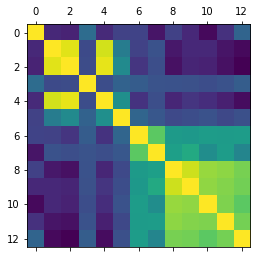

In [23]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_all.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

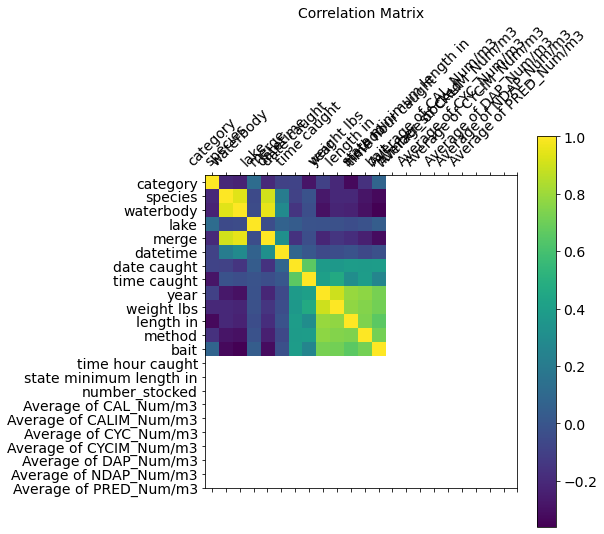

In [24]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(7, 7)) # figure size 
plt.matshow(df_all.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_all.shape[1]), df_all.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_all.shape[1]), df_all.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#this didn't work

In [25]:
df_all.columns

Index(['category', 'species', 'waterbody', 'lake', 'merge', 'datetime',
       'date caught', 'time caught', 'year', 'weight lbs', 'length in',
       'method', 'bait', 'time hour caught', 'state minimum length in',
       'number_stocked', 'Average of CAL_Num/m3', 'Average of CALIM_Num/m3',
       'Average of CYC_Num/m3', 'Average of CYCIM_Num/m3',
       'Average of DAP_Num/m3', 'Average of NDAP_Num/m3',
       'Average of PRED_Num/m3'],
      dtype='object')

In [26]:
# Create a subset

sub = df_all[['year', 'species', 'waterbody','weight lbs', 'length in',
       'time hour caught',
       'number_stocked', 'Average of CAL_Num/m3', 'Average of CALIM_Num/m3',
       'Average of CYC_Num/m3', 'Average of CYCIM_Num/m3',
       'Average of DAP_Num/m3', 'Average of NDAP_Num/m3',
       'Average of PRED_Num/m3']]

In [27]:
sub

,year,species,waterbody,weight lbs,length in,time hour caught,number_stocked,Average of CAL_Num/m3,Average of CALIM_Num/m3,Average of CYC_Num/m3,Average of CYCIM_Num/m3,Average of DAP_Num/m3,Average of NDAP_Num/m3,Average of PRED_Num/m3
0,1997,yellow perch,Lake Huron,1.880000,14.50,9,79930.0,1361.952026,4339.344727,612.466614,2576.439209,2191.528809,843.755676,8.010978
1,1997,rock bass,Lake Erie,1.000000,11.13,14,0.0,1332.809692,3149.196533,4084.126709,17017.671875,9012.268555,11139.411133,266.657654
2,1997,smallmouth bass,Lake Erie,5.560000,21.50,13,131940.0,1332.809692,3149.196533,4084.126709,17017.671875,9012.268555,11139.411133,266.657654
3,1997,brown trout,Lake Huron,16.200001,29.25,11,2020517.0,1361.952026,4339.344727,612.466614,2576.439209,2191.528809,843.755676,8.010978
4,1997,brown trout,Lake Huron,16.120001,31.00,12,2020517.0,1361.952026,4339.344727,612.466614,2576.439209,2191.528809,843.755676,8.010978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2019,lake whitefish,Lake Michigan,7.530000,23.50,11,40112.0,790.883301,1410.258423,597.991638,1807.909546,44.702732,173.392548,14.465708
6996,2019,bluegill,Lake Erie,1.220000,10.00,17,16800.0,2451.749268,3161.735107,2530.455566,3857.070312,2260.997070,2205.742676,45.003391
6997,2019,bluegill,Lake Erie,1.220000,10.00,17,16800.0,2451.749268,3161.735107,2530.455566,3857.070312,2260.997070,2205.742676,45.003391
6998,2019,white crappie,Lake Erie,1.750000,14.63,19,0.0,2451.749268,3161.735107,2530.455566,3857.070312,2260.997070,2205.742676,45.003391


<AxesSubplot:>

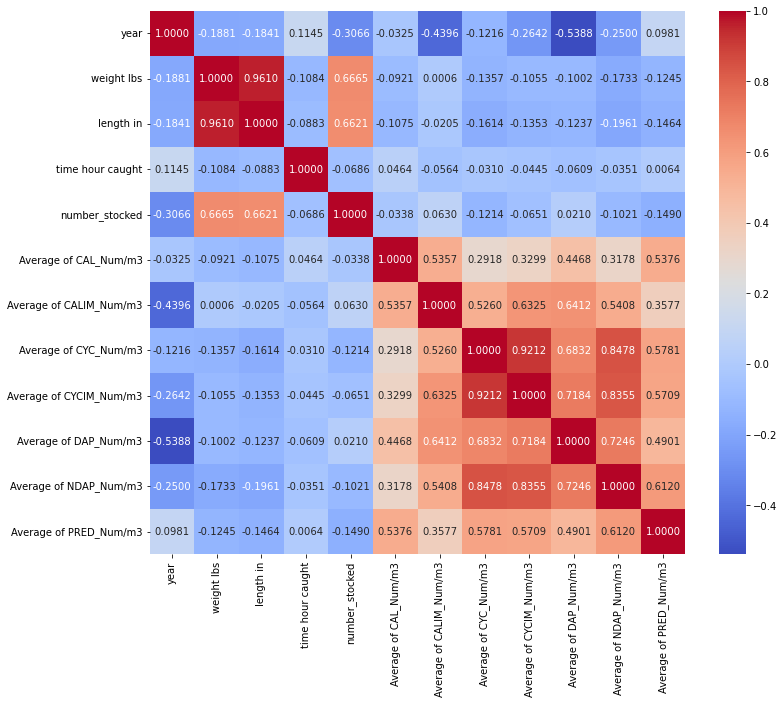

In [28]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(12,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
sns.heatmap(sub.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=True, ax=ax)
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

# Scatterplot

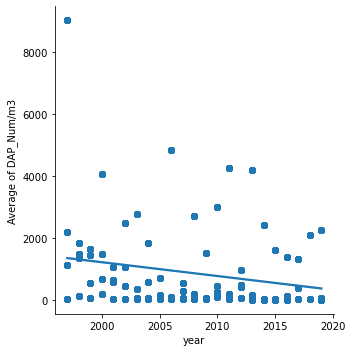

In [29]:
# Create a scatterplot for year and DAP columns in seaborn

sns.lmplot(x = 'year', y = 'Average of DAP_Num/m3', data = df_all)

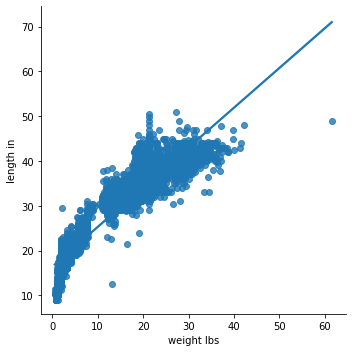

In [30]:
# Create a scatterplot for weight and length columns in seaborn

sns.lmplot(x = 'weight lbs', y = 'length in', data = df_all)

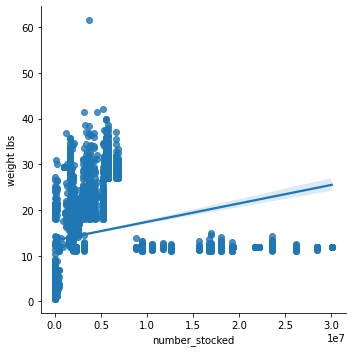

In [31]:
# Create a scatterplot for weight and number_stocked columns in seaborn

sns.lmplot(x = 'number_stocked', y = 'weight lbs', data = df_all)

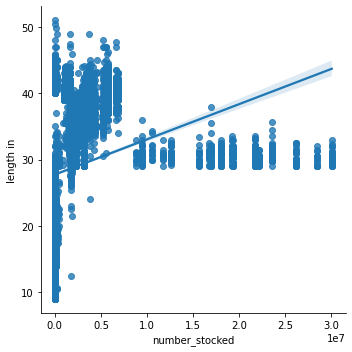

In [32]:
# Create a scatterplot for length and number_stocked columns in seaborn

sns.lmplot(x = 'number_stocked', y = 'length in', data = df_all)

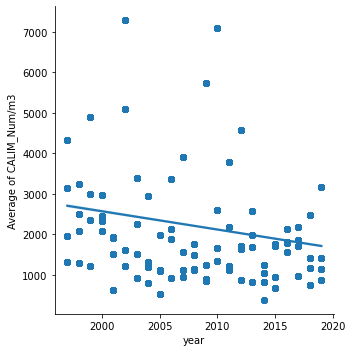

In [33]:
# Create a scatterplot for year and Average of CALIM_Num/m3 columns in seaborn

sns.lmplot(x = 'year', y = 'Average of CALIM_Num/m3', data = df_all)

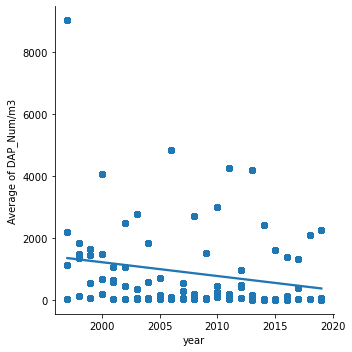

In [34]:
# Create a scatterplot for year and Average of DAP_Num/m3 columns in seaborn

sns.lmplot(x = 'year', y = 'Average of DAP_Num/m3', data = df_all)

# Pair plots

In [35]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['year', 'weight lbs', 'length in',
       'number_stocked', 'Average of CALIM_Num/m3',
       'Average of DAP_Num/m3', 'Average of NDAP_Num/m3']]

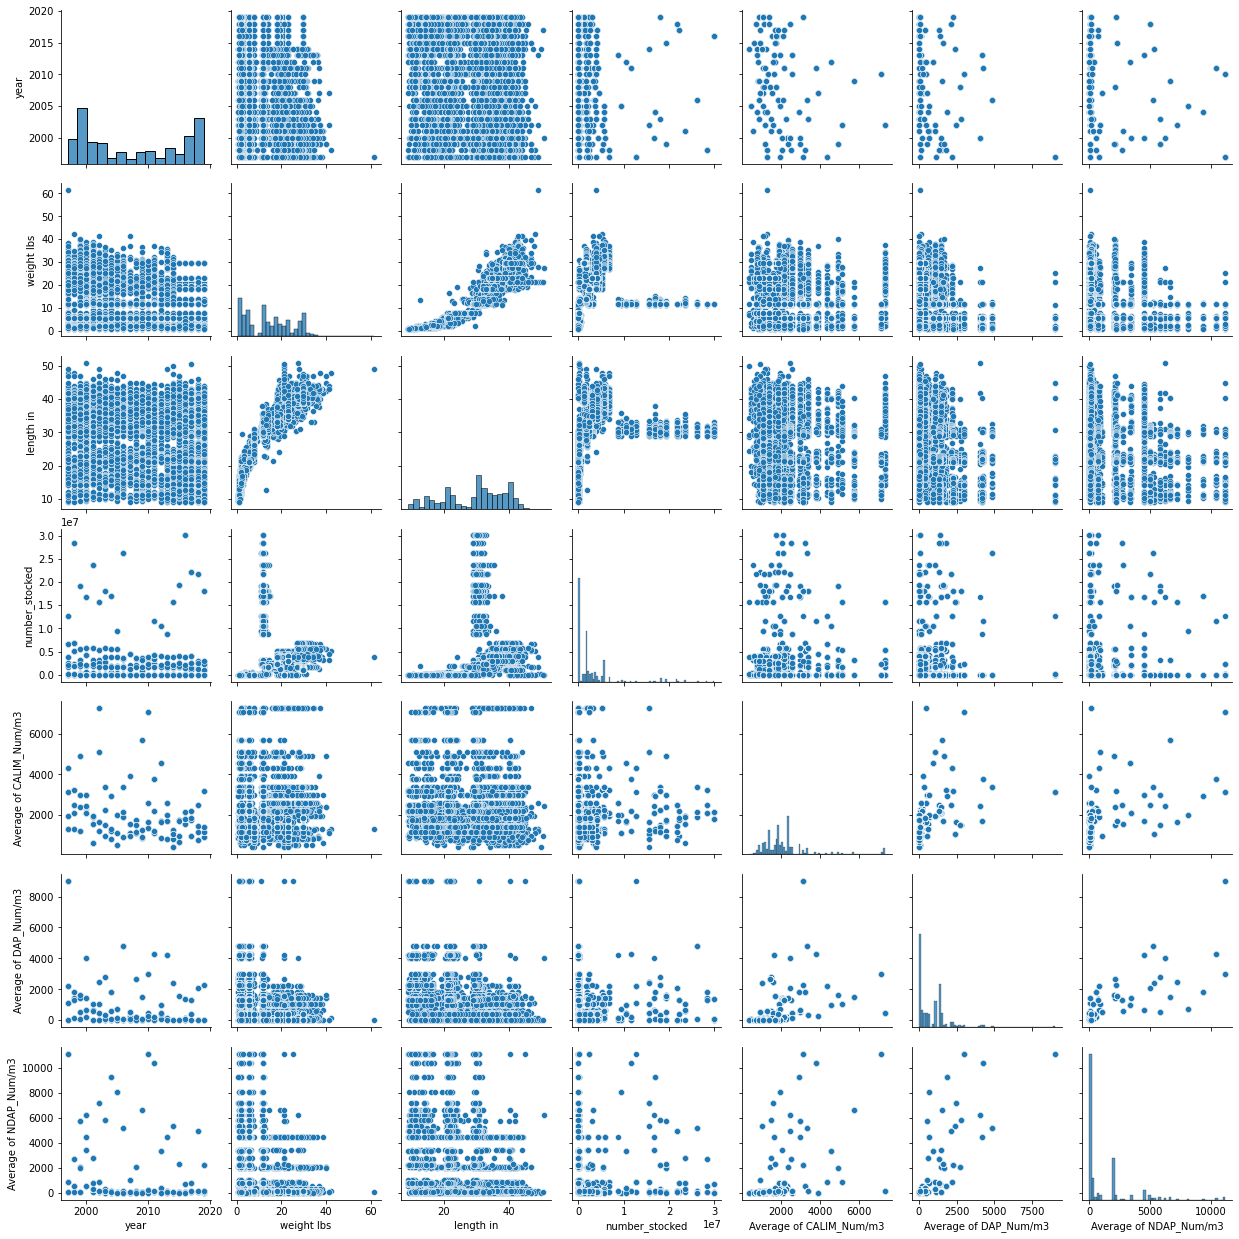

In [36]:
# create pair plot

g = sns.pairplot(sub_2)

# Checking different pairings in the pair plot

In [37]:
#Other variables

sub_3 = sub[['Average of CAL_Num/m3', 'Average of CALIM_Num/m3',
       'Average of CYC_Num/m3', 'Average of CYCIM_Num/m3',
       'Average of DAP_Num/m3', 'Average of NDAP_Num/m3',
       'Average of PRED_Num/m3']]

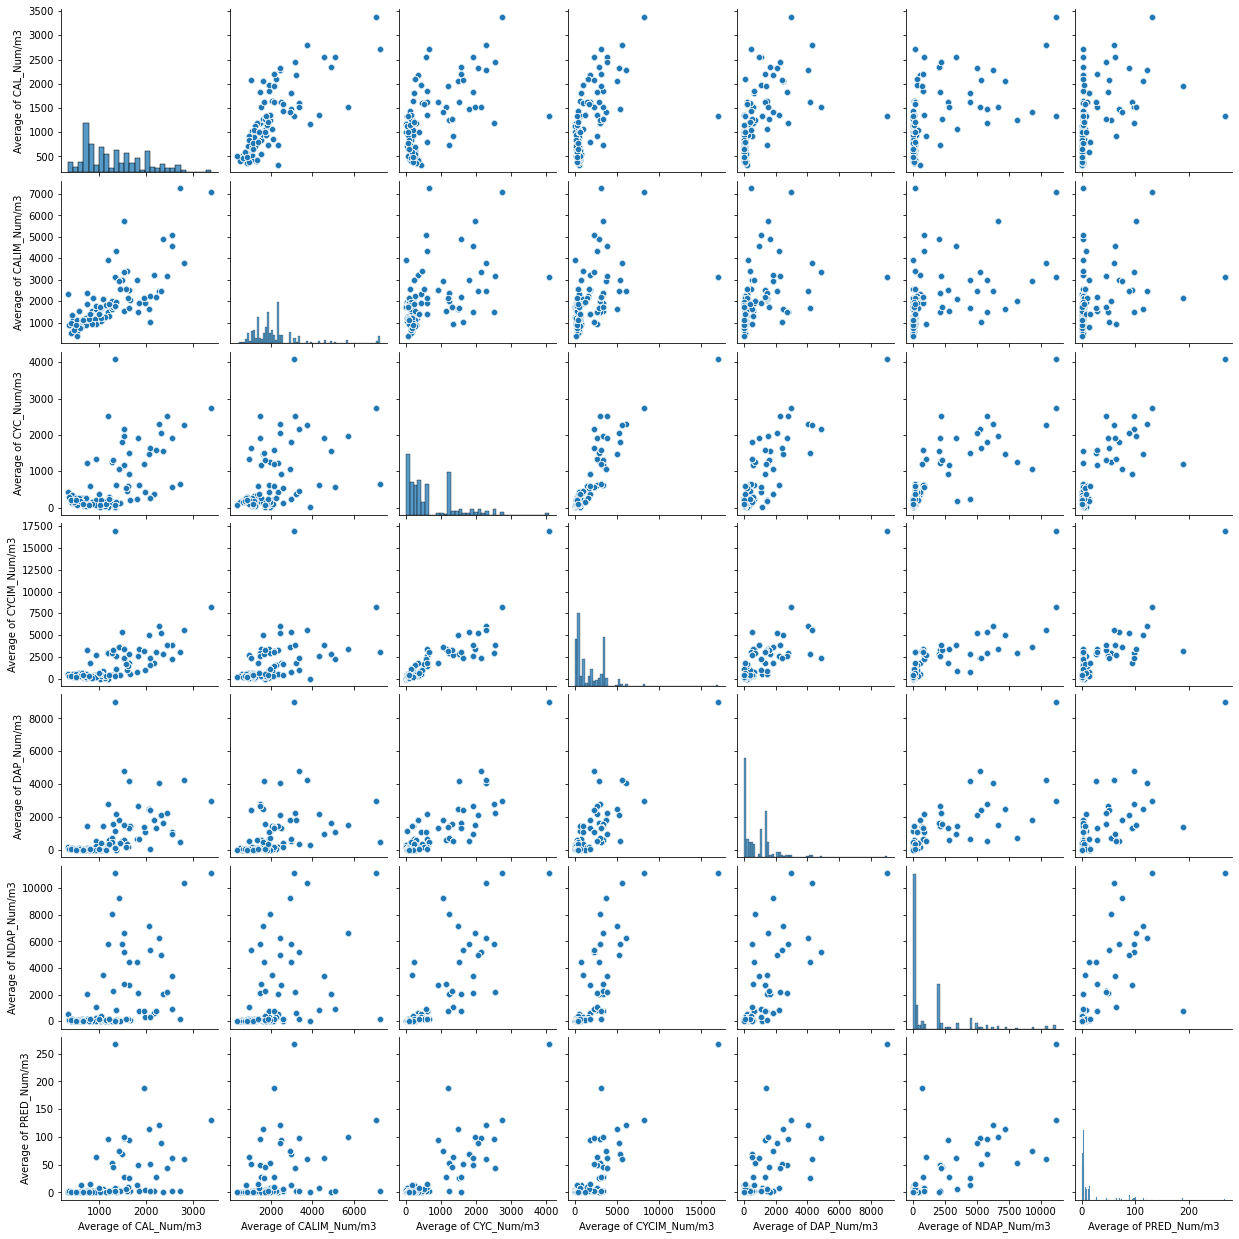

In [38]:
# create pair plot

g2 = sns.pairplot(sub_3)

# Categorical Plots

<AxesSubplot:xlabel='number_stocked', ylabel='Count'>

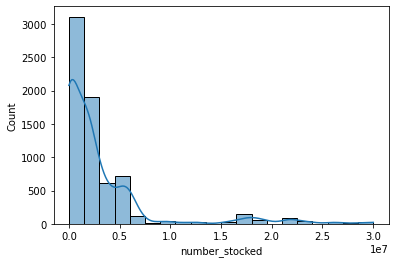

In [39]:
# Use a histogram to visualize the distribution of the household income. 
# This will help create categories for ranges. 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['number_stocked'], bins = 20, kde = True)

In [40]:
#setting up categories
df_all.loc[df_all['number_stocked'] < 1000000, 'stocked_category'] = 'Low'

In [41]:
df_all.loc[(df_all['number_stocked'] >= 1000000) & (df_all['number_stocked'] < 2000000), 'stocked_category'] = 'Average'

In [42]:
df_all.loc[df_all['number_stocked'] >= 2000000, 'stocked_category'] = 'High'

In [43]:
#seeing the number of values in each category
df_all['stocked_category'].value_counts(dropna = False)

Low        2710
High       2571
Average    1719
Name: stocked_category, dtype: int64

In [44]:
#seeing the columns with the change
df_all.columns

Index(['category', 'species', 'waterbody', 'lake', 'merge', 'datetime',
       'date caught', 'time caught', 'year', 'weight lbs', 'length in',
       'method', 'bait', 'time hour caught', 'state minimum length in',
       'number_stocked', 'Average of CAL_Num/m3', 'Average of CALIM_Num/m3',
       'Average of CYC_Num/m3', 'Average of CYCIM_Num/m3',
       'Average of DAP_Num/m3', 'Average of NDAP_Num/m3',
       'Average of PRED_Num/m3', 'stocked_category'],
      dtype='object')

In [45]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   category                 7000 non-null   category      
 1   species                  7000 non-null   category      
 2   waterbody                7000 non-null   category      
 3   lake                     7000 non-null   category      
 4   merge                    7000 non-null   object        
 5   datetime                 7000 non-null   datetime64[ns]
 6   date caught              7000 non-null   datetime64[ns]
 7   time caught              7000 non-null   object        
 8   year                     7000 non-null   int16         
 9   weight lbs               7000 non-null   float32       
 10  length in                7000 non-null   float32       
 11  method                   7000 non-null   category      
 12  bait                     7000 non-

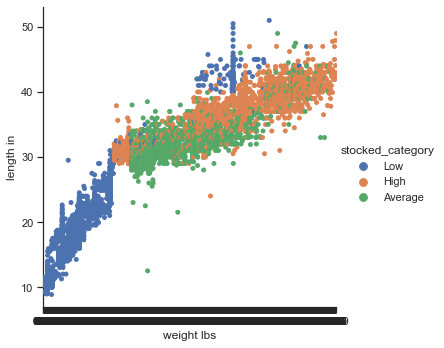

In [46]:
# Create a categorical plot in seaborn using the stocked categories created above

sns.set(style="ticks")
g3 = sns.catplot(x="weight lbs", y="length in", hue="stocked_category", data=df_all)

# It appears species that have been highly stocked have higher weight and length

<AxesSubplot:xlabel='Average of PRED_Num/m3', ylabel='Count'>

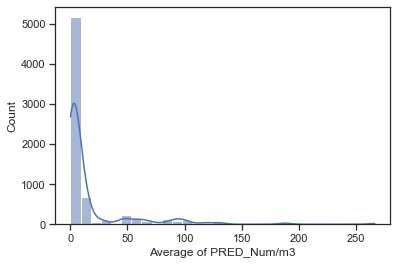

In [47]:
#Creating a histogram
# This will help create categories for ranges. 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['Average of PRED_Num/m3'], bins = 30, kde = True)

In [48]:
#setting up categories
df_all.loc[df_all['Average of PRED_Num/m3'] < 5, 'PRED_category'] = 'Low'

In [49]:
df_all.loc[(df_all['Average of PRED_Num/m3'] >= 5) & (df_all['Average of PRED_Num/m3'] < 30), 'PRED_category'] = 'Average'

In [50]:
df_all.loc[df_all['Average of PRED_Num/m3'] >= 30, 'PRED_category'] = 'High'

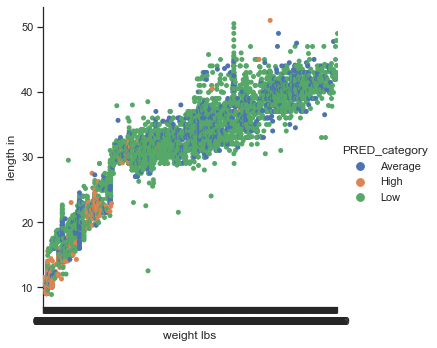

In [51]:
# Create a categorical plot in seaborn using the PRED categories created above
# seeing if Predatory cladocerans affect length and size

sns.set(style="ticks")
g4 = sns.catplot(x="weight lbs", y="length in", hue="PRED_category", data=df_all)

In [52]:
#seeing the number of values in each category
df_all['PRED_category'].value_counts(dropna = False)

Low        4386
Average    1609
High       1005
Name: PRED_category, dtype: int64

# It appears that having a high PRED in the water, may contribute to smaller fish.

<AxesSubplot:xlabel='Average of CAL_Num/m3', ylabel='Count'>

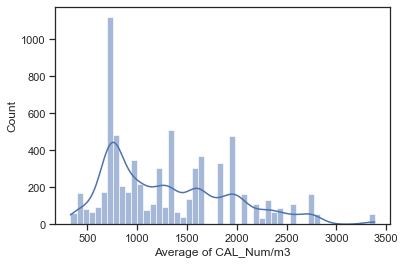

In [53]:
#Creating a histogram
# This will help create categories for ranges. 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['Average of CAL_Num/m3'], bins = 50, kde = True)

In [54]:
#setting up categories
df_all.loc[df_all['Average of CAL_Num/m3'] < 900, 'CAL_category'] = 'Low'

In [55]:
df_all.loc[(df_all['Average of CAL_Num/m3'] >= 900) & (df_all['Average of CAL_Num/m3'] < 1700), 'CAL_category'] = 'Average'

In [56]:
df_all.loc[df_all['Average of CAL_Num/m3'] >= 1700, 'CAL_category'] = 'High'

In [57]:
#seeing the number of values in each category
df_all['CAL_category'].value_counts(dropna = False)

Average    2754
Low        2457
High       1789
Name: CAL_category, dtype: int64

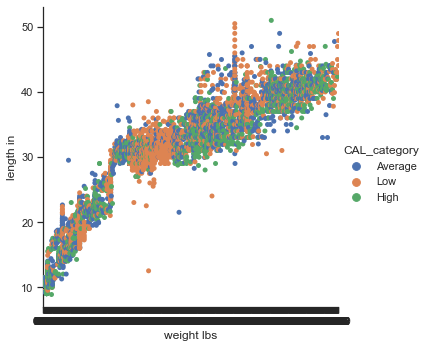

In [58]:
# Create a categorical plot in seaborn using the CAL categories created above
# seeing if Calanoid copepod affect length and size

sns.set(style="ticks")
g5 = sns.catplot(x="weight lbs", y="length in", hue="CAL_category", data=df_all)

# I'm not seeing a pattern with CAL in the water and the weight or length of the fish.

<AxesSubplot:xlabel='Average of CALIM_Num/m3', ylabel='Count'>

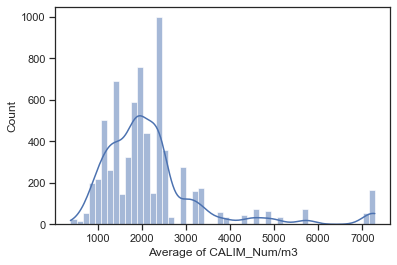

In [59]:
#Creating a histogram
# This will help create categories for ranges. 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['Average of CALIM_Num/m3'], bins = 50, kde = True)

In [60]:
#setting up categories
df_all.loc[df_all['Average of CALIM_Num/m3'] < 1700, 'CALIM_category'] = 'Low'

In [61]:
df_all.loc[(df_all['Average of CALIM_Num/m3'] >= 1700) & (df_all['Average of CALIM_Num/m3'] < 21000), 'CALIM_category'] = 'Average'

In [62]:
df_all.loc[df_all['Average of CALIM_Num/m3'] >= 2100, 'CALIM_category'] = 'High'

In [63]:
#seeing the number of values in each category
df_all['CALIM_category'].value_counts(dropna = False)

High       2950
Low        2232
Average    1818
Name: CALIM_category, dtype: int64

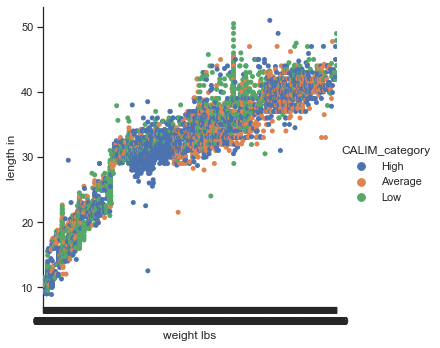

In [64]:
# Create a categorical plot in seaborn using the CALIM categories created above
# seeing if Calanoid copepod copepodites affect length and size

sns.set(style="ticks")
g6 = sns.catplot(x="weight lbs", y="length in", hue="CALIM_category", data=df_all)

# It kind of looks like having average and high might contribute to larger fish.

In [65]:
# I'm going to reassess with only 2 categories
#setting up categories
df_all.loc[df_all['Average of CALIM_Num/m3'] < 2000, 'CALIM_category2'] = 'Low'

In [66]:
df_all.loc[df_all['Average of CALIM_Num/m3'] >= 2000, 'CALIM_category2'] = 'High'

In [67]:
#seeing the number of values in each category
df_all['CALIM_category2'].value_counts(dropna = False)

Low     3793
High    3207
Name: CALIM_category2, dtype: int64

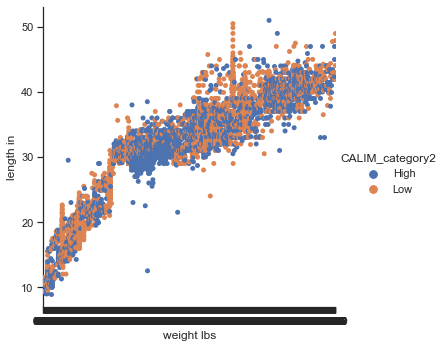

In [68]:
# Create a categorical plot in seaborn using the CALIM categories created above
# seeing if Calanoid copepod copepodites affect length and size with only options of high and low

sns.set(style="ticks")
g7 = sns.catplot(x="weight lbs", y="length in", hue="CALIM_category2", data=df_all)

# I'm not really sure, there isn't a huge divide between the 2 categories to easily say high CALIM zooplankton = larger fish.

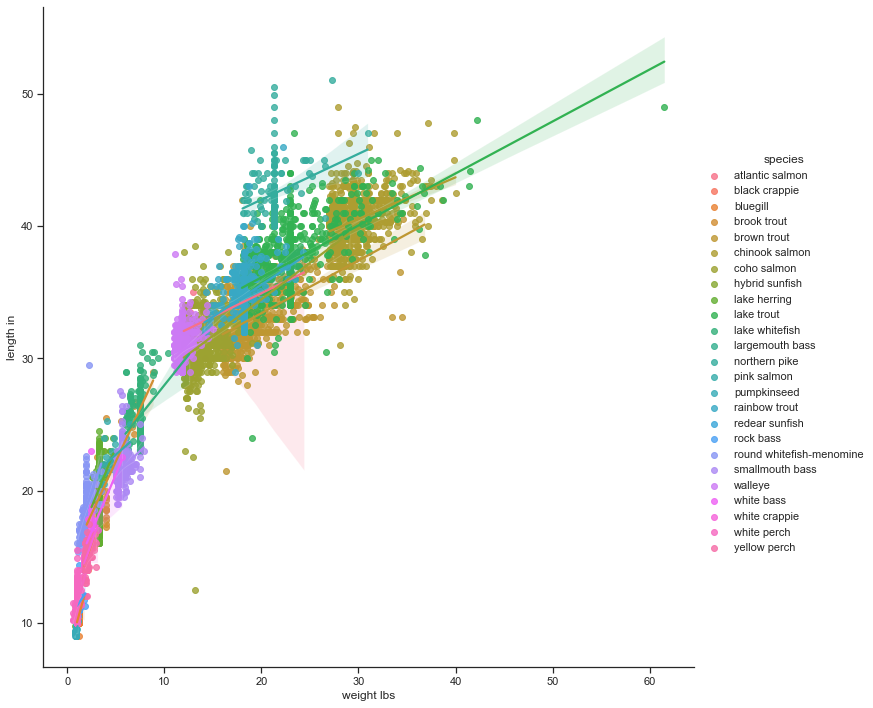

In [69]:
# add regression line per group Seaborn
sns.lmplot(x="weight lbs", 
           y="length in", 
           hue="species",
           data=df_all,
           height=10)
plt.xlabel("weight lbs")
plt.ylabel("length in")
plt.savefig("species_regression_line.png",
                    format='png',dpi=400)

# I was just playing around to see the patterns of fish. It might be interesting to see say just the salmon and if they vary in length and weight. This does show that each species obviously has different lengths. So species will contribute to length.

<AxesSubplot:xlabel='Average of CYC_Num/m3', ylabel='Count'>

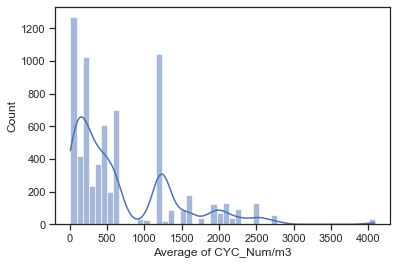

In [70]:
#Creating a histogram
# This will help create categories for ranges. 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['Average of CYC_Num/m3'], bins = 50, kde = True)

In [79]:
#setting up categories
df_all.loc[df_all['Average of CYC_Num/m3'] < 200, 'CYC_category'] = 'Low'

In [88]:
df_all.loc[(df_all['Average of CYC_Num/m3'] >= 200) & (df_all['Average of CYC_Num/m3'] < 900), 'CYC_category'] = 'Average'

In [81]:
df_all.loc[df_all['Average of CYC_Num/m3'] >= 900, 'CYC_category'] = 'High'

In [82]:
#seeing the number of values in each category
df_all['CYC_category'].value_counts(dropna = False)

Average    2884
High       2185
Low        1931
Name: CYC_category, dtype: int64

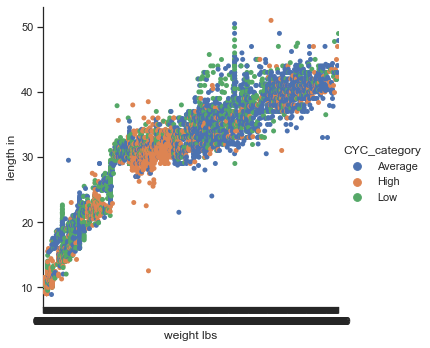

In [83]:
# Create a categorical plot in seaborn using the CYC categories created above
# seeing if Cyclopoid copepod affect length and size with only options of high and low

sns.set(style="ticks")
g8 = sns.catplot(x="weight lbs", y="length in", hue="CYC_category", data=df_all)

# I don't really see a pattern

<AxesSubplot:xlabel='Average of CYCIM_Num/m3', ylabel='Count'>

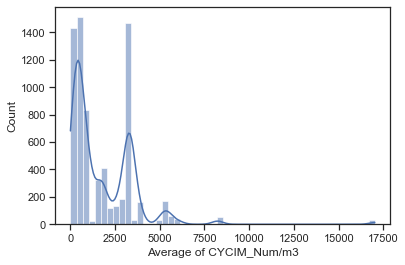

In [84]:
#Creating a histogram
# This will help create categories for ranges. 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['Average of CYCIM_Num/m3'], bins = 50, kde = True)

In [92]:
#setting up categories
df_all.loc[df_all['Average of CYCIM_Num/m3'] < 500, 'CYCIM_category'] = 'Low'

In [93]:
df_all.loc[(df_all['Average of CYCIM_Num/m3'] >= 500) & (df_all['Average of CYCIM_Num/m3'] < 2600), 'CYCIM_category'] = 'Average'

In [90]:
df_all.loc[df_all['Average of CYCIM_Num/m3'] >= 2600, 'CYCIM_category'] = 'High'

In [94]:
#seeing the number of values in each category
df_all['CYCIM_category'].value_counts(dropna = False)

Average    2592
High       2309
Low        2099
Name: CYCIM_category, dtype: int64

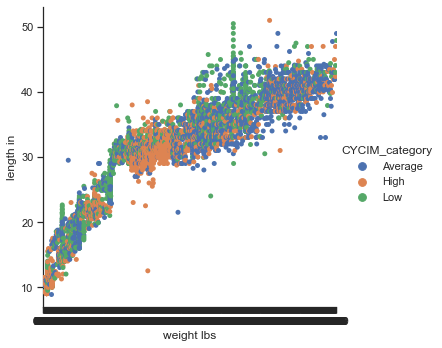

In [95]:
# Create a categorical plot in seaborn using the CYCIM categories created above
# seeing if Cyclopoid copepod copepodites affect length and size

sns.set(style="ticks")
g8 = sns.catplot(x="weight lbs", y="length in", hue="CYCIM_category", data=df_all)

<AxesSubplot:xlabel='Average of DAP_Num/m3', ylabel='Count'>

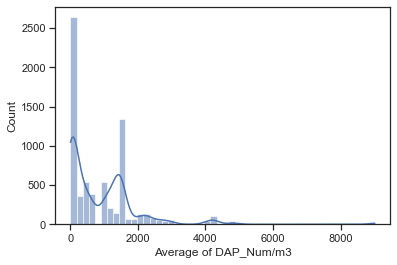

In [96]:
#Creating a histogram
# This will help create categories for ranges. 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['Average of DAP_Num/m3'], bins = 50, kde = True)

In [97]:
#setting up categories
df_all.loc[df_all['Average of DAP_Num/m3'] < 50, 'DAP_category'] = 'Low'

In [98]:
df_all.loc[(df_all['Average of DAP_Num/m3'] >= 50) & (df_all['Average of DAP_Num/m3'] < 1600), 'DAP_category'] = 'Average'

In [99]:
df_all.loc[df_all['Average of DAP_Num/m3'] >= 1600, 'DAP_category'] = 'High'

In [100]:
#seeing the number of values in each category
df_all['DAP_category'].value_counts(dropna = False)

Average    4367
Low        1790
High        843
Name: DAP_category, dtype: int64

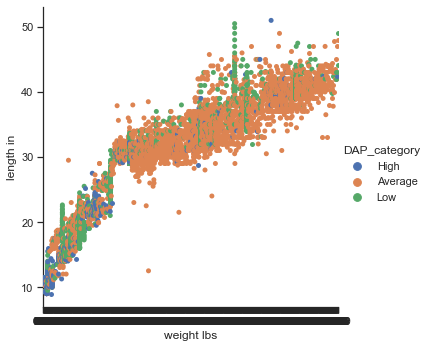

In [101]:
# Create a categorical plot in seaborn using the DAP categories created above
# seeing if Daphnia affect length and size

sns.set(style="ticks")
g9 = sns.catplot(x="weight lbs", y="length in", hue="DAP_category", data=df_all)

<AxesSubplot:xlabel='Average of NDAP_Num/m3', ylabel='Count'>

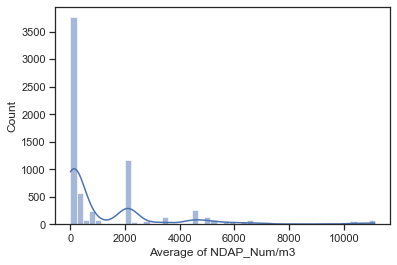

In [102]:
#Creating a histogram
# This will help create categories for ranges. 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['Average of NDAP_Num/m3'], bins = 50, kde = True)

In [103]:
#setting up categories
df_all.loc[df_all['Average of NDAP_Num/m3'] < 100, 'NDAP_category'] = 'Low'

In [104]:
df_all.loc[(df_all['Average of NDAP_Num/m3'] >= 100) & (df_all['Average of NDAP_Num/m3'] < 1800), 'NDAP_category'] = 'Average'

In [105]:
df_all.loc[df_all['Average of NDAP_Num/m3'] >= 1800, 'NDAP_category'] = 'High'

In [106]:
#seeing the number of values in each category
df_all['NDAP_category'].value_counts(dropna = False)

Average    2738
High       2292
Low        1970
Name: NDAP_category, dtype: int64

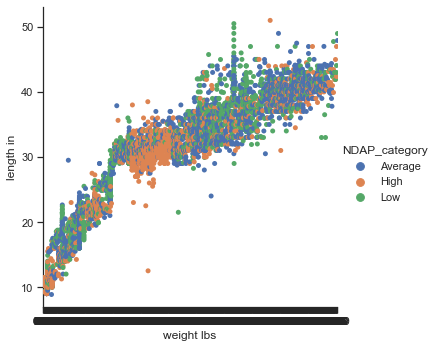

In [107]:
# Create a categorical plot in seaborn using the NDAP categories created above
# seeing if Non-daphnid herbivorous cladocerans affect length and size

sns.set(style="ticks")
g10 = sns.catplot(x="weight lbs", y="length in", hue="NDAP_category", data=df_all)

# I can't really see a pattern here either

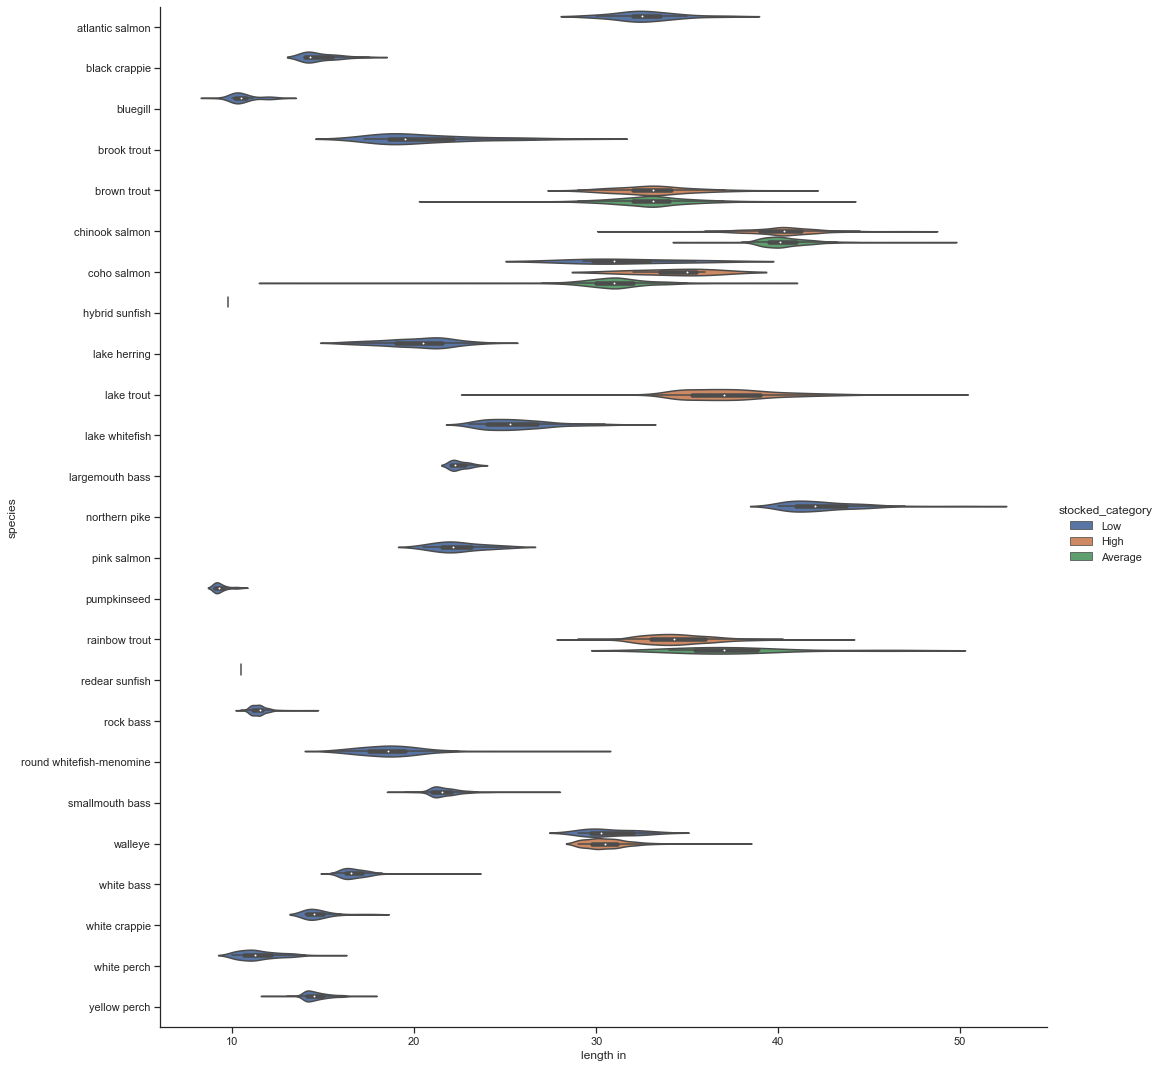

In [146]:
# Creating a categorical plot in seaborn
g11 = sns.catplot(x="length in", y="species",
                hue="stocked_category",
                data=df_all,
                orient="h", height=15, aspect=1,
                kind="violin", dodge=True)
plt.savefig('violin_stocked_length.png')

# It looks like DNR has focused on stocking brown trout, chinook salmon, coho, lake trout, rainbow trout and walleye.

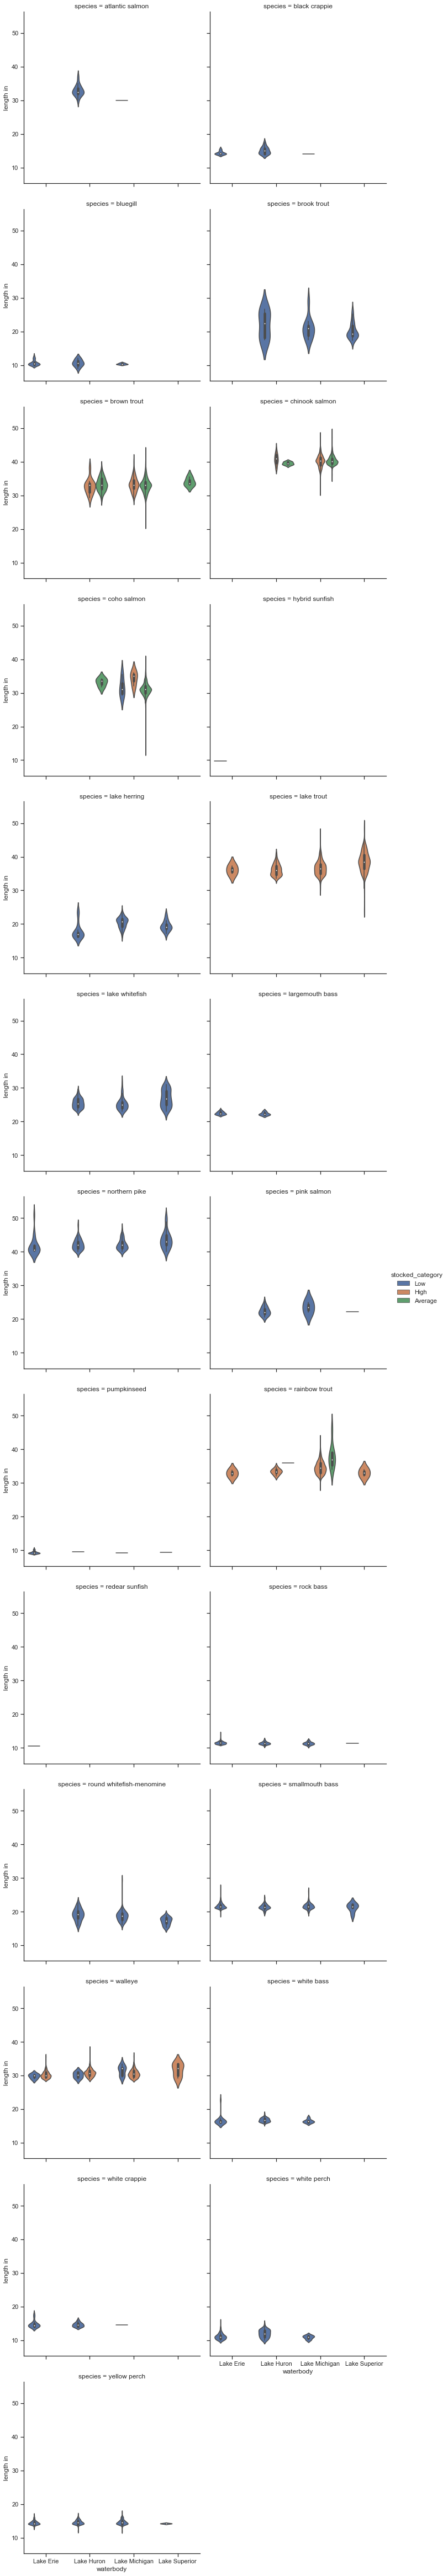

In [186]:
# Creating a categorical plot in seaborn
g12 = sns.catplot(x="waterbody", y="length in",
                  col="species", col_wrap=2,
                hue="stocked_category",
                data=df_all,
                height=5, aspect=1,
                kind="violin", dodge=True)
plt.savefig('violin_waterbody_length.png')

# Brown trout are highly stocked in Lake Huron and Michigan. Chinook salmon are highly stocked in Lakes Huron and Michigan. Coho is highly stocked in Lake Michigan. Lake trout, rainbow trout and walleye are highly stocked in all 4 lakes. 

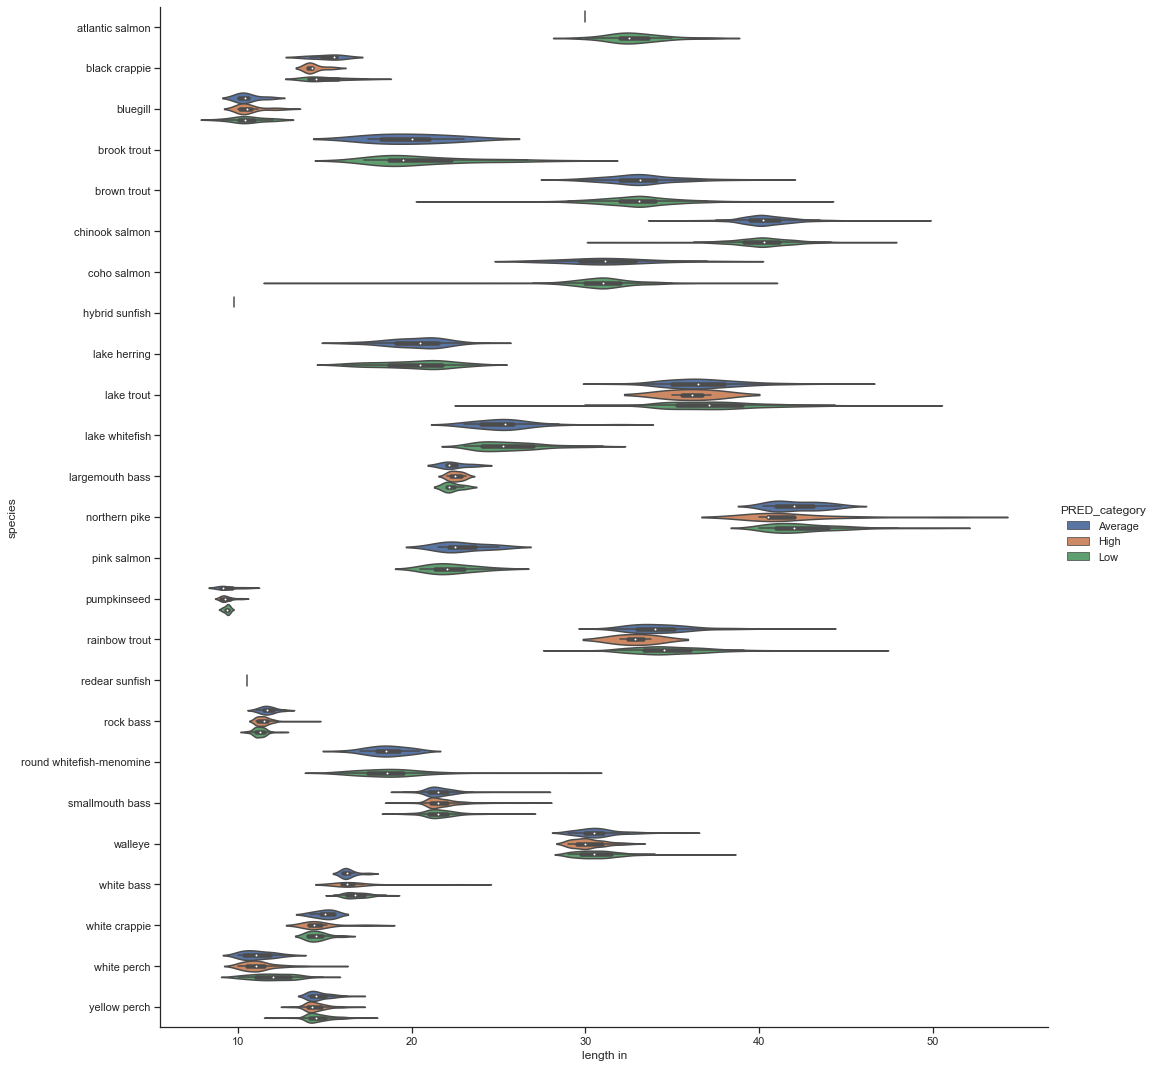

In [187]:
# Creating a categorical plot in seaborn
g13 = sns.catplot(x="length in", y="species",
                hue="PRED_category",
                data=df_all,
                orient="h", height=15, aspect=1,
                kind="violin", dodge=True)
plt.savefig('violin_PRED_length.png')

# Predatory cladocerans: It does not appear that this zooplankton has a relationship with length when looking at each species of fish.

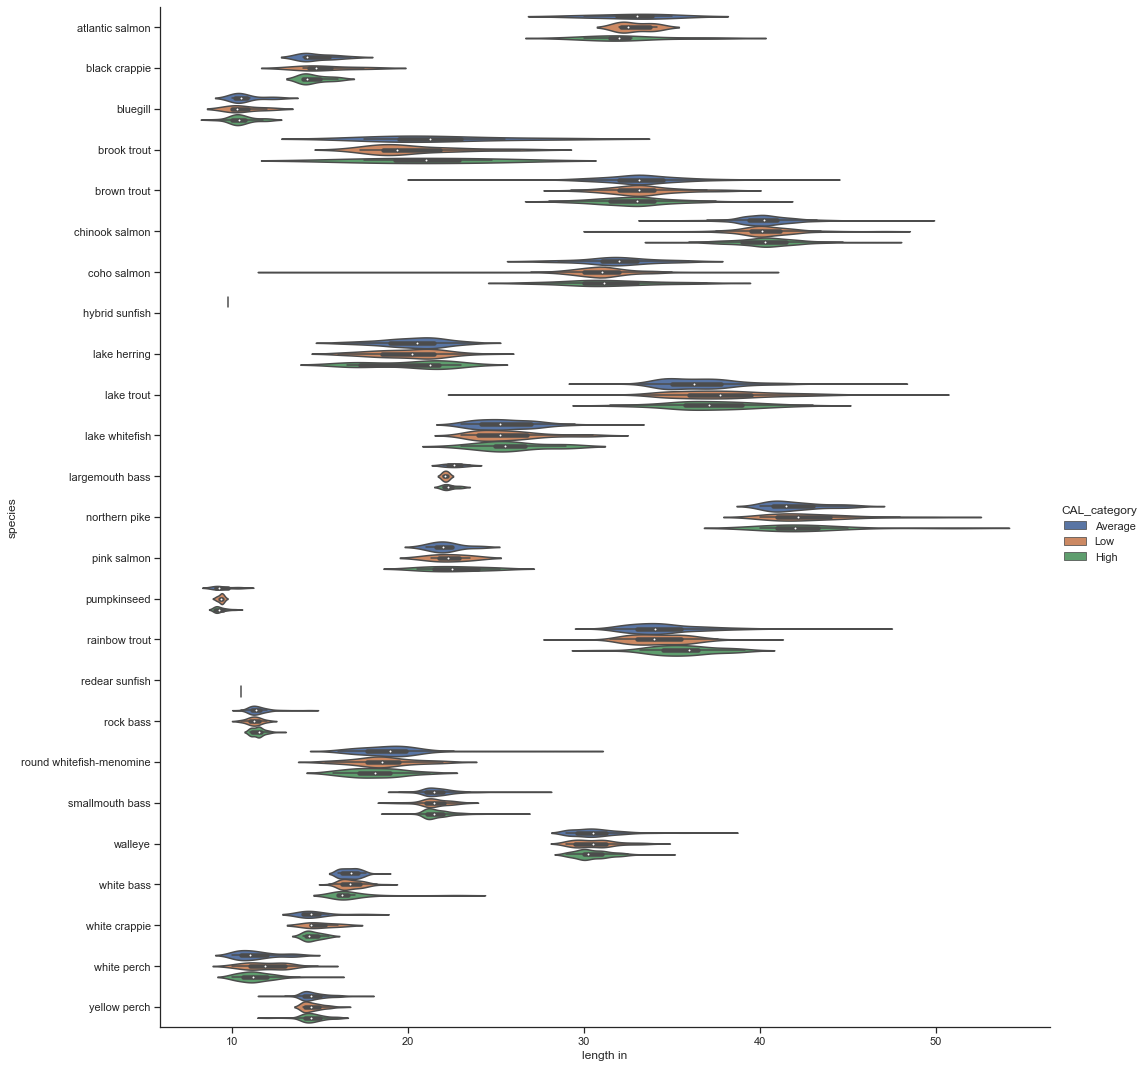

In [188]:
# Creating a categorical plot in seaborn
g14 = sns.catplot(x="length in", y="species",
                hue="CAL_category",
                data=df_all,
                orient="h", height=15, aspect=1,
                kind="violin", dodge=True)
plt.savefig('violin_CAL_length.png')

# Calanoid copepod adults: High category seems to reduce length of atlantic salmon. High category seems to increase length of rainbow trout. 

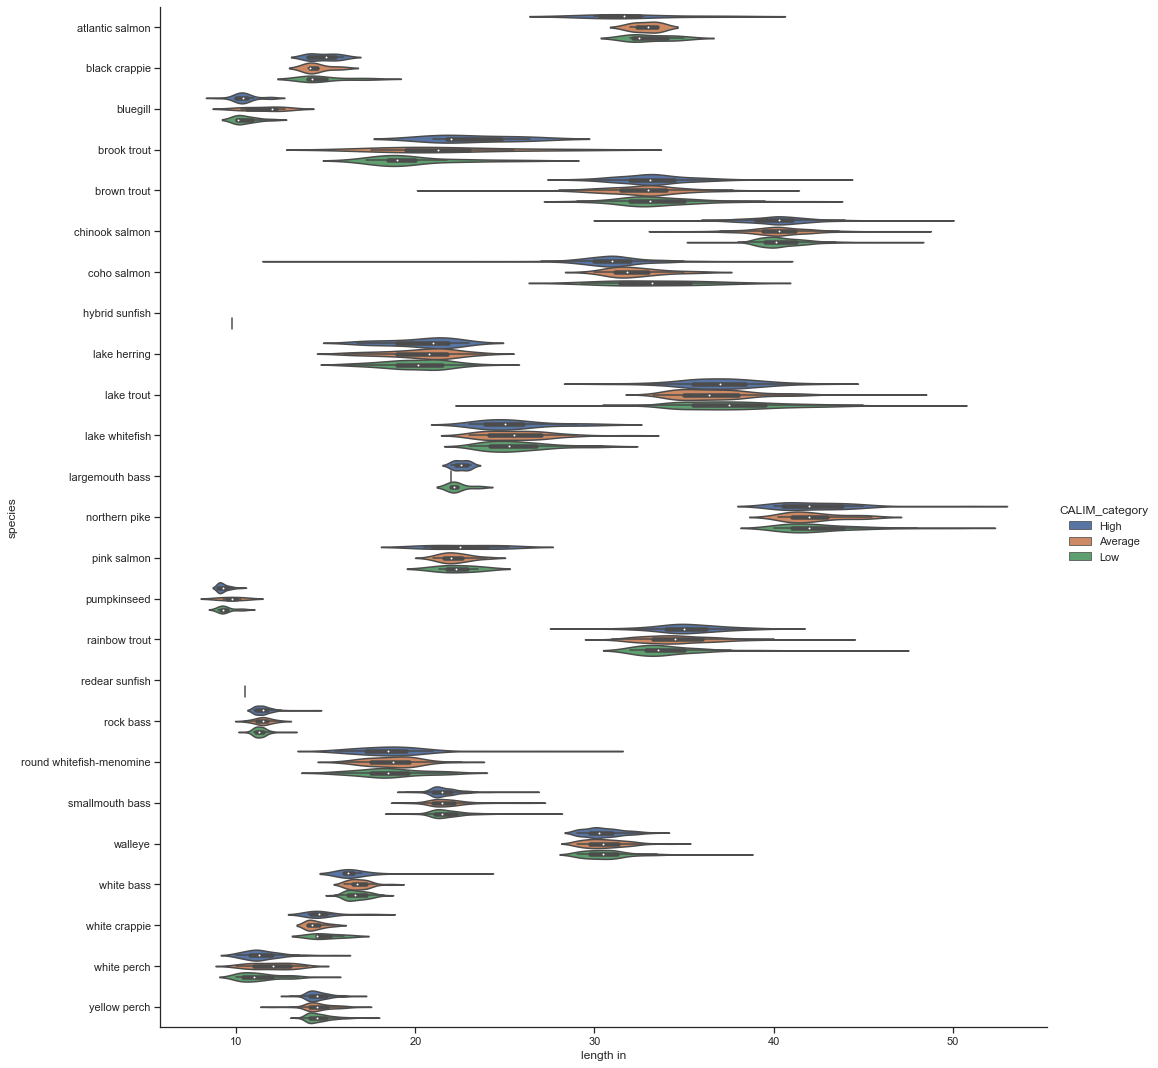

In [189]:
# Creating a categorical plot in seaborn
g15 = sns.catplot(x="length in", y="species",
                hue="CALIM_category",
                data=df_all,
                orient="h", height=15, aspect=1,
                kind="violin", dodge=True)
plt.savefig('violin_CALIM_length.png')

# Calanoid copepod copepodites: High category seems to indicate increase in length in black crappie and brook trout.

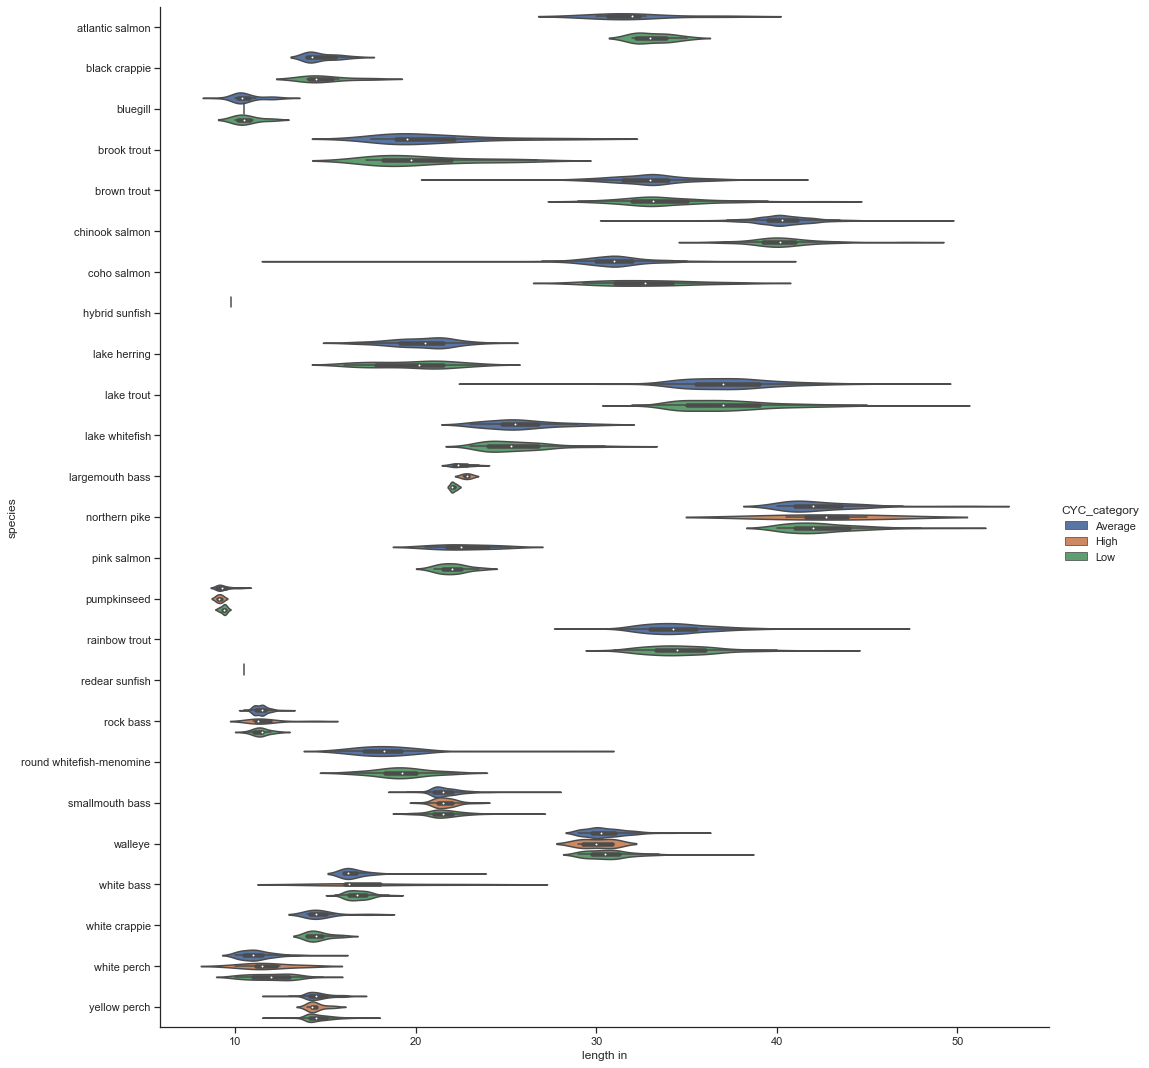

In [190]:
# Creating a categorical plot in seaborn
g16 = sns.catplot(x="length in", y="species",
                hue="CYC_category",
                data=df_all,
                orient="h", height=15, aspect=1,
                kind="violin", dodge=True)
plt.savefig('violin_CYC_length.png')

# Cyclopoid copepod adults: Low category seems to be associated with increased length in atlantic salmon. High category may be associated with an increased length in northern pike.

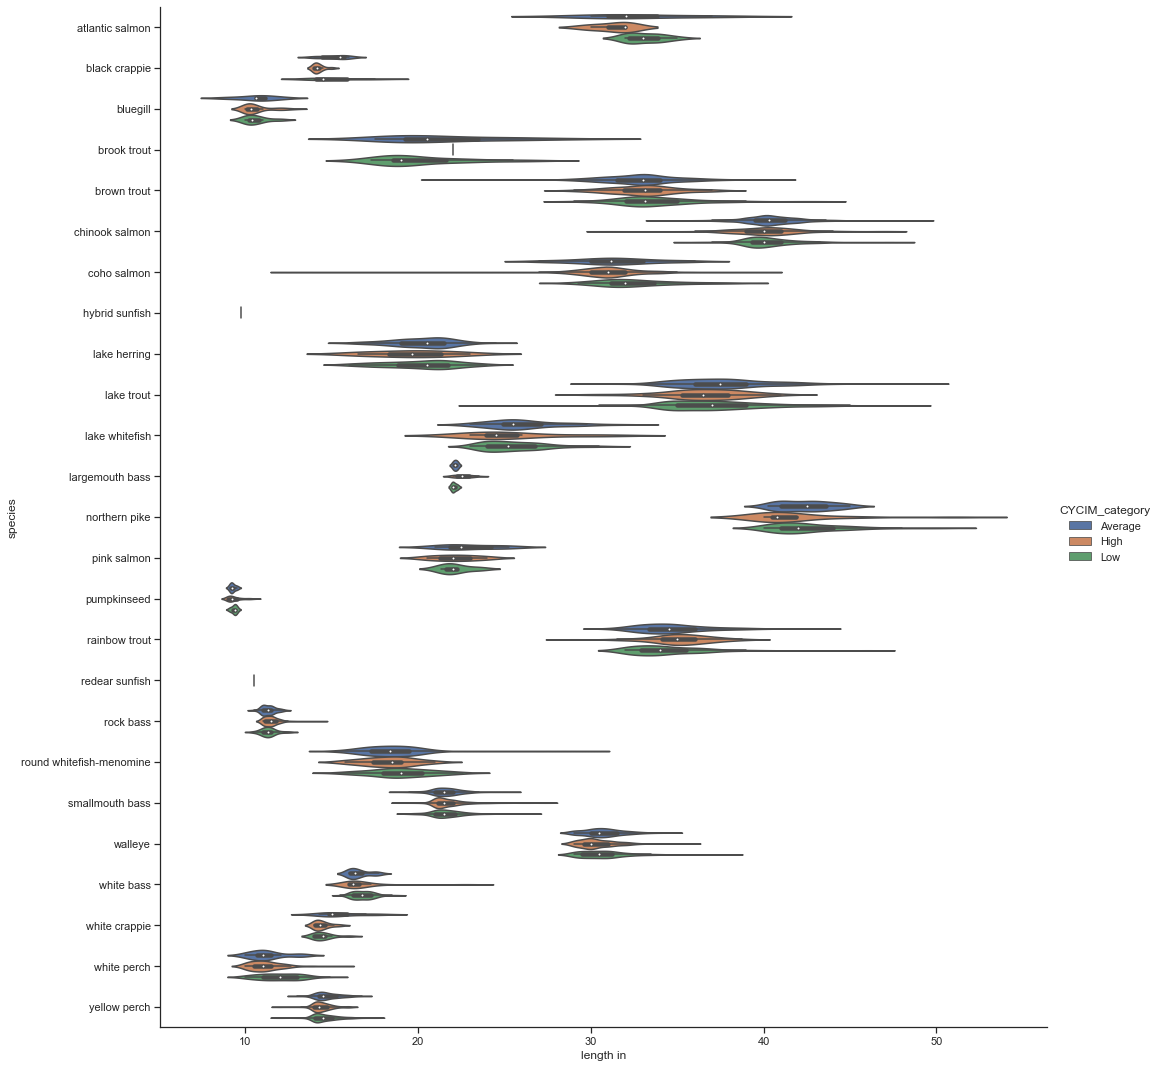

In [191]:
# Creating a categorical plot in seaborn
g17 = sns.catplot(x="length in", y="species",
                hue="CYCIM_category",
                data=df_all,
                orient="h", height=15, aspect=1,
                kind="violin", dodge=True)
plt.savefig('violin_CYCIM_length.png')

# Cyclopoid copepod copepodites: Low category levels may be associated with greater length in atlantic salmon. High category levels may be associated with greater length in rainbow trout.

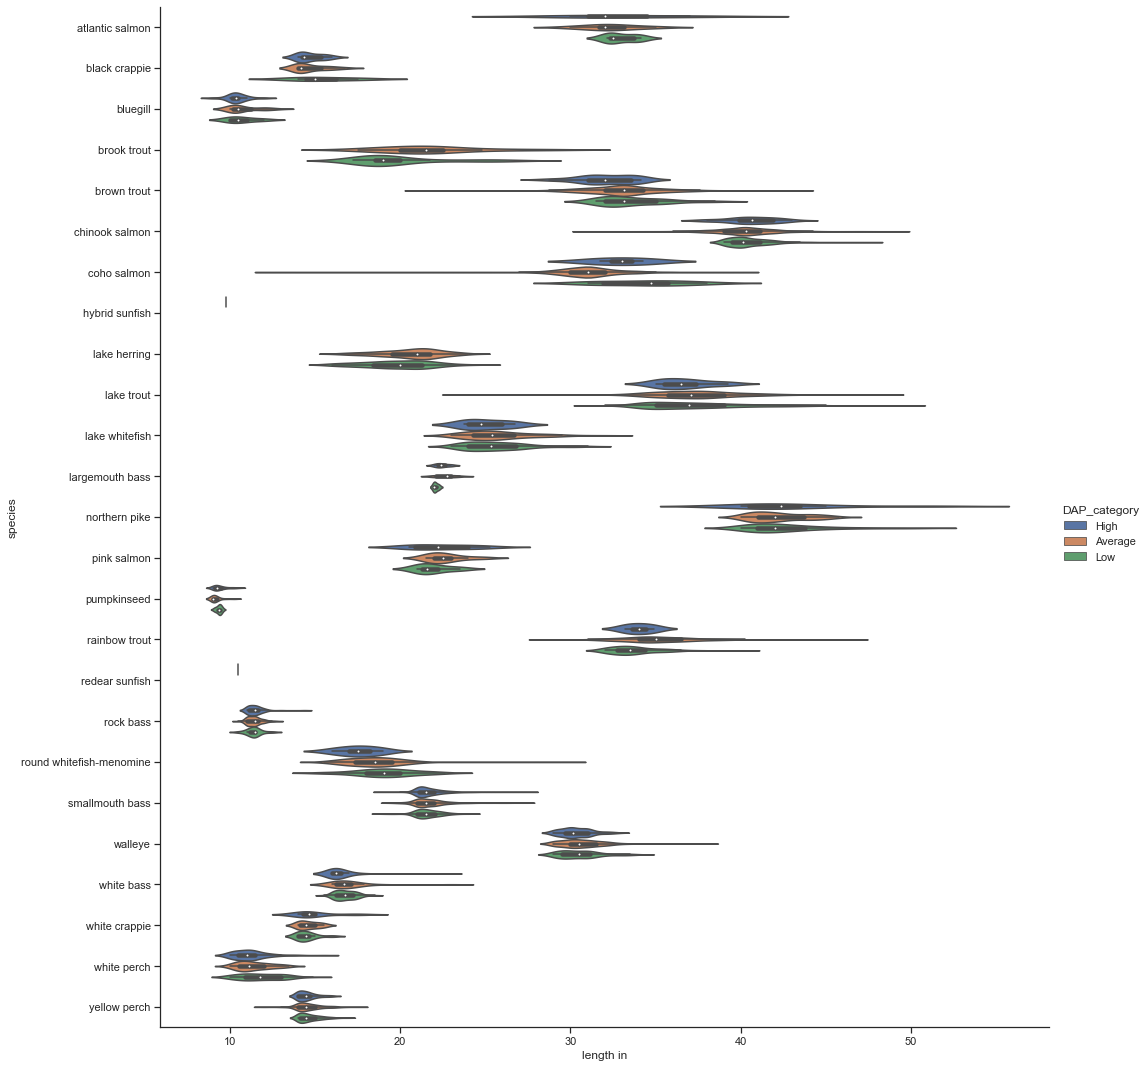

In [192]:
# Creating a categorical plot in seaborn
g18 = sns.catplot(x="length in", y="species",
                hue="DAP_category",
                data=df_all,
                orient="h", height=15, aspect=1,
                kind="violin", dodge=True)
plt.savefig('violin_DAP_length.png')

# Daphnia: Low category may be associated with greater length in atlantic salmon and brook trout. High category may be associated with lower length in round whitefish-menomine.

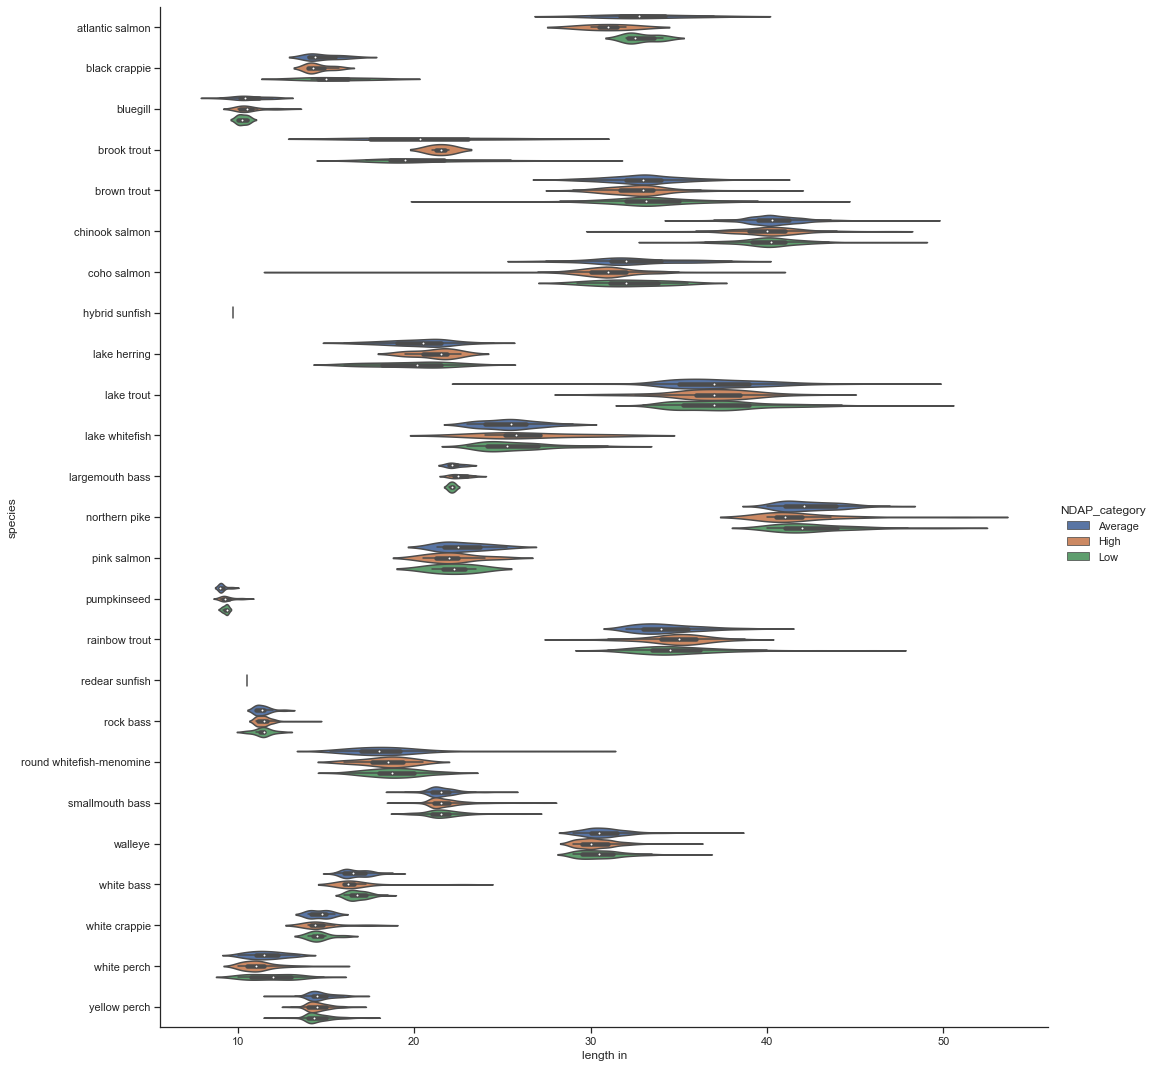

In [193]:
# Creating a categorical plot in seaborn
g19 = sns.catplot(x="length in", y="species",
                hue="NDAP_category",
                data=df_all,
                orient="h", height=15, aspect=1,
                kind="violin", dodge=True)
plt.savefig('violin_NDAP_length.png')

# Non-daphnid herbivorous cladocerans: Low levels may be associated with greater length in atlantic salmon. 

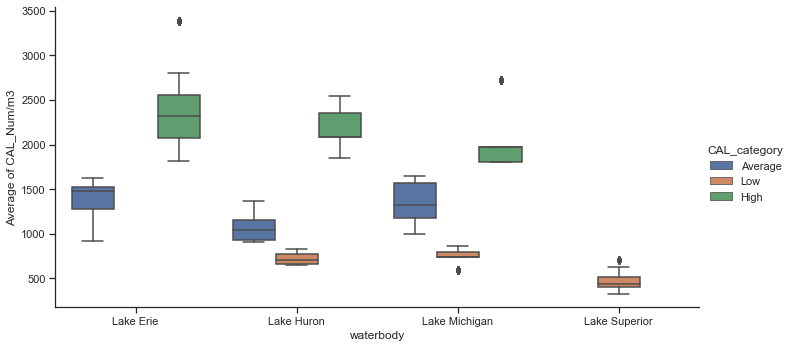

In [196]:
# Creating a categorical plot in seaborn
g20 = sns.catplot(x='waterbody', y = 'Average of CAL_Num/m3', 
            hue="CAL_category",
            data = df_all,
            kind = 'box',
            height = 5,
            aspect=2)
plt.savefig('boxplot_CAL_waterbody.png')

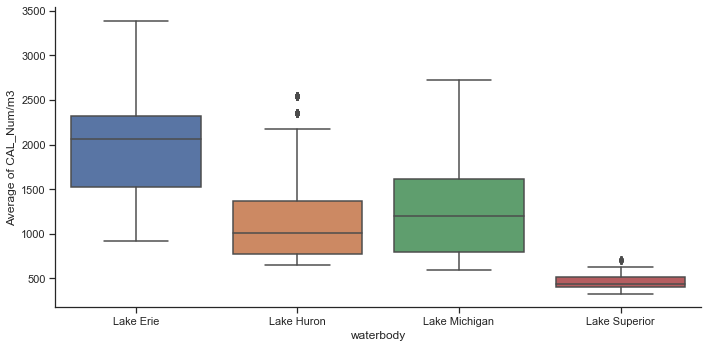

In [197]:
# Creating a plot in seaborn
g21 = sns.catplot(x='waterbody', y = 'Average of CAL_Num/m3', 
            data = df_all,
            kind = 'box',
            height = 5,
            aspect=2)
plt.savefig('plot_CAL_waterbody.png')

# Lake Erie seems to have a higher of amount of Calanoid copepod adults.

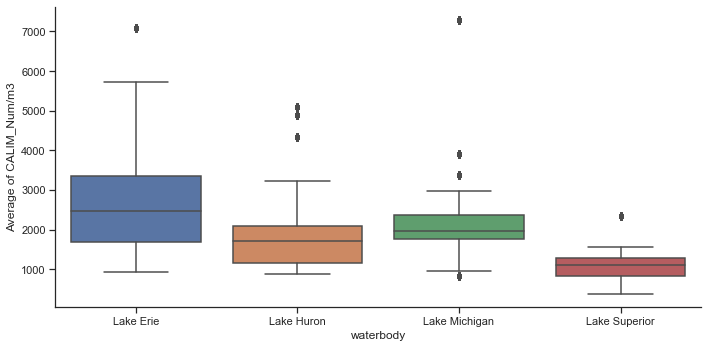

In [198]:
# Creating a plot in seaborn
g22 = sns.catplot(x='waterbody', y = 'Average of CALIM_Num/m3', 
            data = df_all,
            kind = 'box',
            height = 5,
            aspect=2)
plt.savefig('plot_CALIM_waterbody.png')

# Lake Erie, Lake Huron and Lake Michigan seem to have a higher amount of Calanoid copepod copepodites.

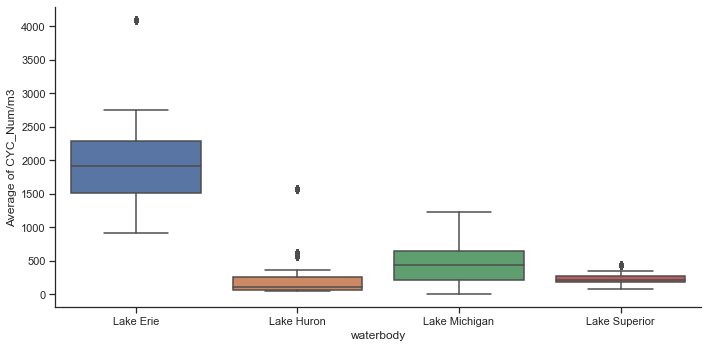

In [199]:
# Creating a plot in seaborn
g23 = sns.catplot(x='waterbody', y = 'Average of CYC_Num/m3', 
            data = df_all,
            kind = 'box',
            height = 5,
            aspect=2)
plt.savefig('plot_CYC_waterbody.png')

# Lake Erie seems to have a higher amount of Cyclopoid copepod adults.

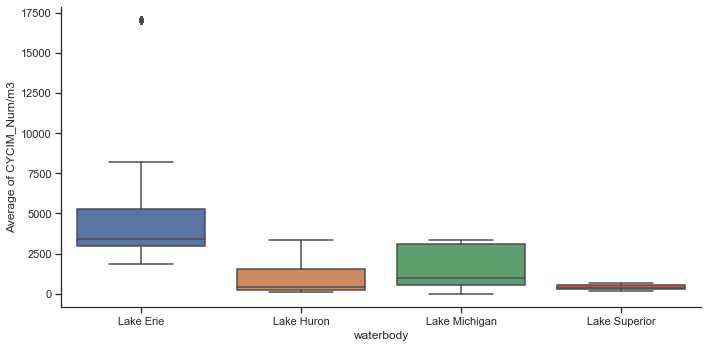

In [200]:
# Creating a plot in seaborn
g24 = sns.catplot(x='waterbody', y = 'Average of CYCIM_Num/m3', 
            data = df_all,
            kind = 'box',
            height = 5,
            aspect=2)
plt.savefig('plot_CYCIM_waterbody.png')

# Lake Erie seems to have a higher amount of Cyclopoid copepod copepodites.

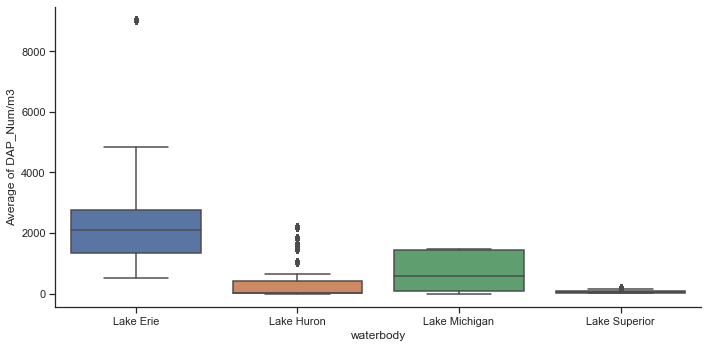

In [201]:
# Creating a plot in seaborn
g25 = sns.catplot(x='waterbody', y = 'Average of DAP_Num/m3', 
            data = df_all,
            kind = 'box',
            height = 5,
            aspect=2)
plt.savefig('plot_DAP_waterbody.png')

# Lake Erie and Lake Michigan seem to have higher amounts of Daphnia.

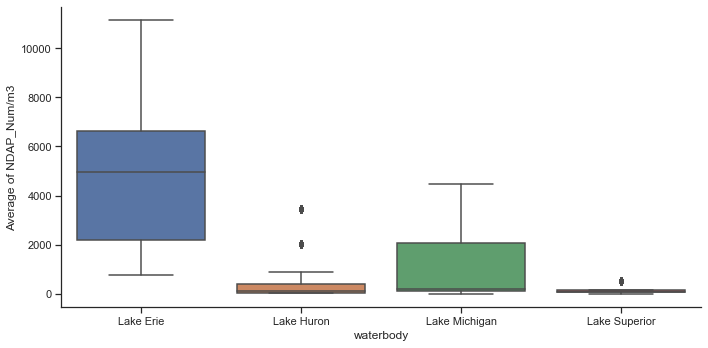

In [202]:
# Creating a plot in seaborn
g26 = sns.catplot(x='waterbody', y = 'Average of NDAP_Num/m3', 
            data = df_all,
            kind = 'box',
            height = 5,
            aspect=2)
plt.savefig('plot_NDAP_waterbody.png')

# Lake Erie seems to have a higher amount of Non-daphnid herbivorous cladocerans.

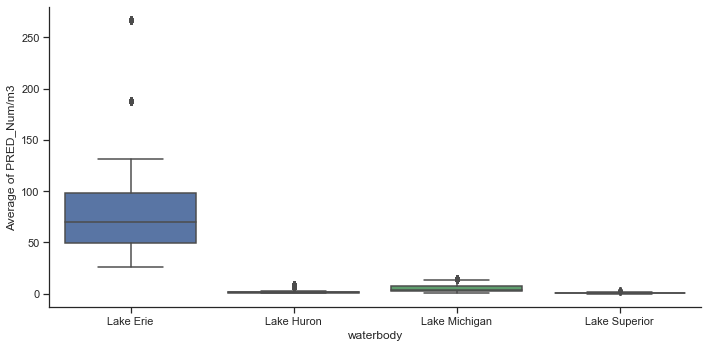

In [203]:
# Creating a plot in seaborn
g27 = sns.catplot(x='waterbody', y = 'Average of PRED_Num/m3', 
            data = df_all,
            kind = 'box',
            height = 5,
            aspect=2)
plt.savefig('plot_PRED_waterbody.png')

# Lake Erie has a substantial amount of Predatory cladocerans.

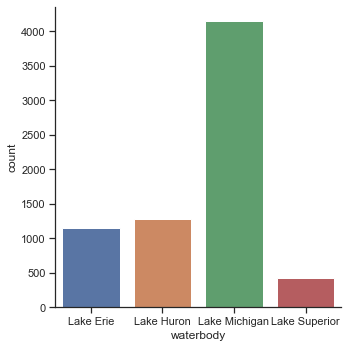

In [206]:
#seeing the counts of fish from each lake
g28 = sns.catplot(x="waterbody", 
            kind="count", 
            data=df_all)
plt.savefig('bar_count_waterbody.png')

In [207]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   category                 7000 non-null   category      
 1   species                  7000 non-null   category      
 2   waterbody                7000 non-null   category      
 3   lake                     7000 non-null   category      
 4   merge                    7000 non-null   object        
 5   datetime                 7000 non-null   datetime64[ns]
 6   date caught              7000 non-null   datetime64[ns]
 7   time caught              7000 non-null   object        
 8   year                     7000 non-null   int16         
 9   weight lbs               7000 non-null   float32       
 10  length in                7000 non-null   float32       
 11  method                   7000 non-null   category      
 12  bait                     7000 non-

In [208]:
#exporting the categories as a csv
df_all.to_csv(os.path.join(path, '02 Data','Prepared', 'categories_anglers_size_stocking_plankton_combined.csv'))